# Exploratory Data Analysis (EDA) of mobile sales datasey

This dataset comprises of all the models launched by various companies till 2021.
This dataset contains:
- 3114 values
- 11 features

#### Import libraries and basic information about the dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
data= pd.read_csv('Sales.csv')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [119]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [120]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [121]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


# Data cleaning

### Removing Null values 

In [122]:
data.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [123]:
data.dropna(inplace=True)

In [124]:
data.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

### Removing Duplicates

In [125]:
data.duplicated().sum()

91

In [126]:
data.drop_duplicates(keep="first", inplace=True)

In [127]:
data.duplicated().sum()

0

In [128]:
#apply strip to each column
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,LG,Q Stylus,Black,3 GB,32 GB,Yes,3.8,20000,20000,LG Q Stylus,0,0.000000
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750


# Explorartory data analysis

### 1. Brand wise distribution

In [129]:
brands = data['Brands'].value_counts()
brands = brands.reset_index()
brands.columns = ['Brands', 'Count']
brands

,Brands,Count
0,SAMSUNG,673
1,realme,276
2,Apple,257
3,OPPO,248
4,Xiaomi,191
5,Nokia,183
6,Infinix,150
7,GIONEE,126
8,Lenovo,116
9,vivo,114


Thresold values to show others in piechart

In [130]:
threshold = 110
df_main = brands[brands['Count'] >= threshold].copy()
df_others = brands[brands['Count'] < threshold].copy()
others_count = df_others['Count'].sum()
df_main.loc[len(df_main.index)] = ['Others', others_count]
sm = brands['Count'].sum()

Creating a clor palette for the pie chart.

In [131]:
colors = sns.color_palette("coolwarm", len(df_main))[::-1]


Creating a explode list that will help to hightlight the top 2 mobile brands of the dataset.

In [132]:
explode = explode = [0] * len(df_main)
explode[0]=0.2
explode[1]=0.1

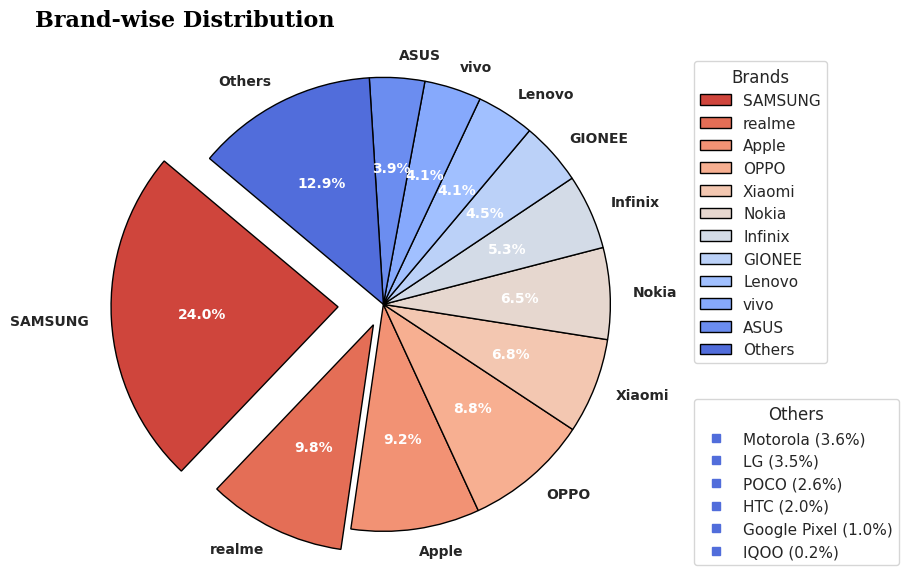

In [133]:
fig, ax = plt.subplots(figsize=(9, 6))

# Create the pie chart with custom colors and explode values
wedges, texts, autotexts = ax.pie(
    df_main['Count'],
    labels=df_main['Brands'],
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='black') 
)

# legends
percentages = [f'{p:.1f}%' for p in (df_others['Count'] / sm * 100)]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(df_others['Brands'], percentages)]
legend1 = ax.legend(wedges, df_main['Brands'], title="Brands", loc="upper left", bbox_to_anchor=(1, 1))
other_handles = [plt.Line2D([0], [0], marker='s', linestyle='None', color=colors[-1]) for _ in df_others['Brands']]
legend2 = ax.legend(other_handles, legend_labels, title="Others", loc="lower left", bbox_to_anchor=(1, 0))
ax.add_artist(legend1)

# Customize font properties for better readability
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.setp(texts, size=10, weight='bold')


plt.title("Brand-wise Distribution", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                                    'color':'Black',
                                                                    'weight':'bold',
                                                                    'size': 16,
                                                                    'stretch':'expanded'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


We can see the majority of the products are from the brand "Samsung" followed by "Apple" and "Realme".

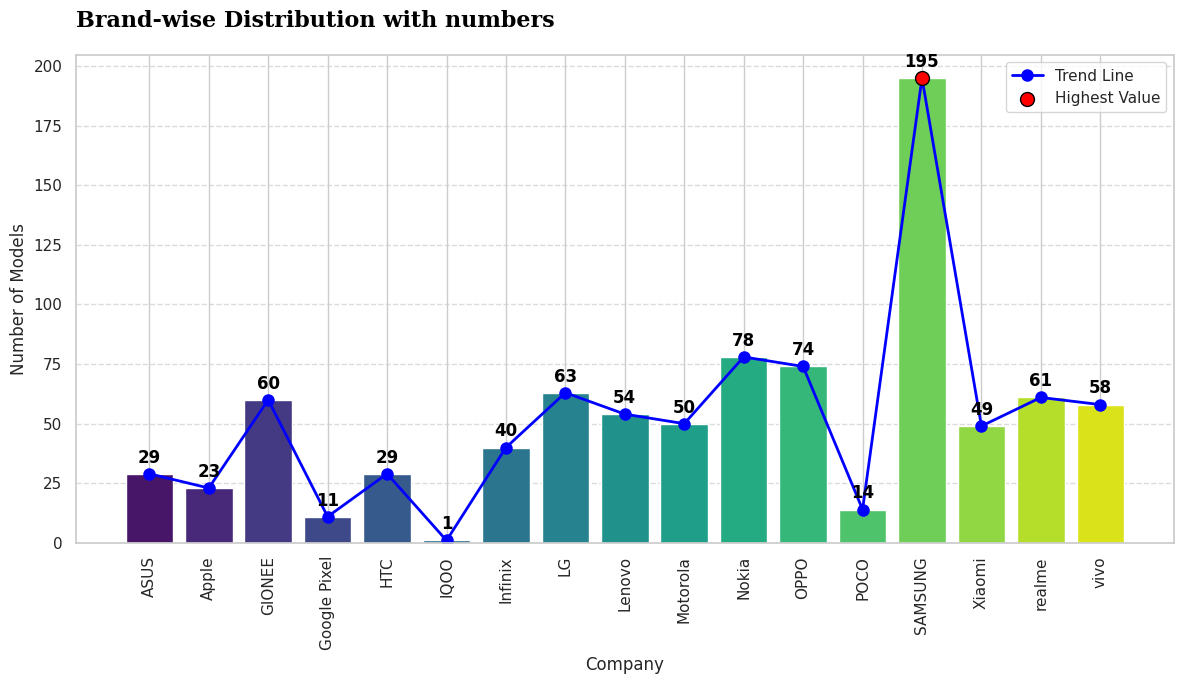

In [134]:
# Calculate the number of unique models by company
models_of_company = data.groupby('Brands')['Models'].nunique()

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title("Brand-wise Distribution with numbers", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                                    'color':'Black',
                                                                    'weight':'bold',
                                                                    'size': 16,
                                                                    'stretch':'expanded'})


# Create the bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(models_of_company))

# Create the bar plot
bars = plt.bar(models_of_company.index, models_of_company.values, color=custom_palette)

# Add a curve line
x = np.arange(len(models_of_company))
plt.plot(x, models_of_company.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval+3, f'{yval}', va='bottom', ha='center', fontsize=12, color='black', weight='bold')

# Mark the highest value
max_value = models_of_company.max()
max_index = models_of_company.idxmax()
plt.scatter(max_index, max_value, color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

plt.legend()
plt.xlabel('Company')
plt.ylabel('Number of Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

We can see **samsung** has the most number of models in the dataset. Hence samung is the most popular brand in the dataset. 

This signifies that either samsung have most number of models releases per year or each model of samsung has multiple variants.

### 2. Color wise distribution 

In [135]:
color_count = data.Colors.value_counts()

color_count=color_count.head(10)
color_count


Colors
Black             429
Gold              176
White             148
Blue              130
Silver             84
Red                65
Grey               44
Midnight Black     35
Space Grey         31
Rose Gold          27
Name: count, dtype: int64

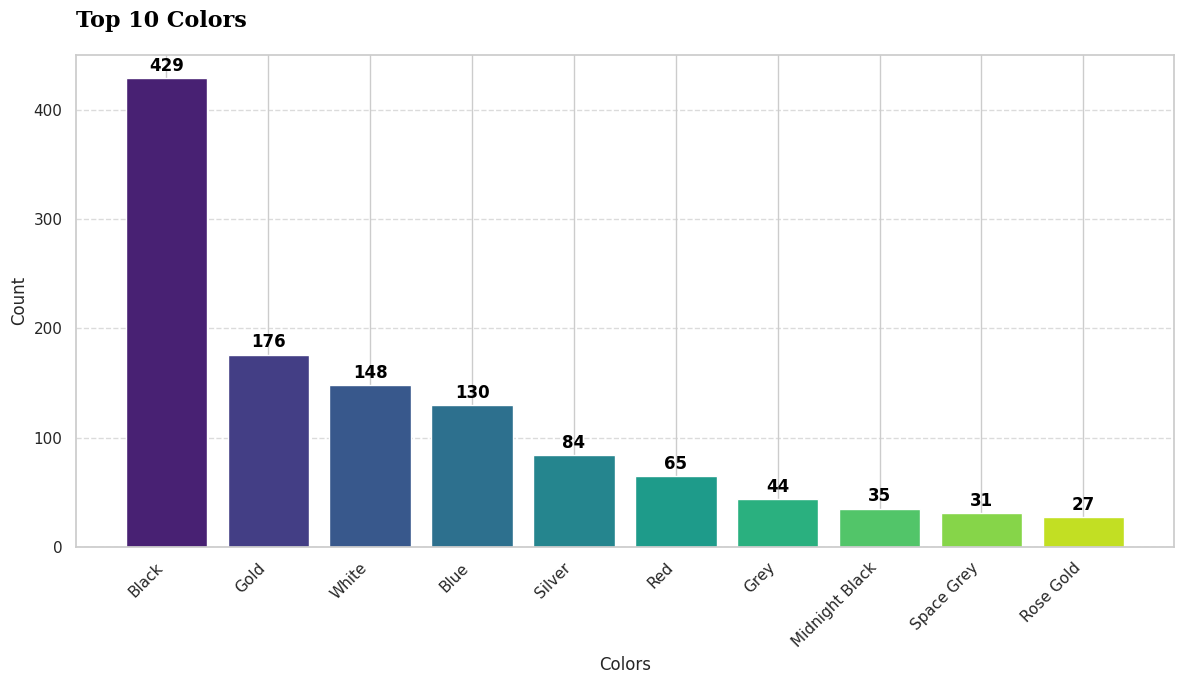

In [136]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

plt.title("Top 10 Colors", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                        'color':'Black',
                                                        'weight':'bold',
                                                        'size': 16,
                                                        'stretch':'expanded'})


custom_palette = sns.color_palette("viridis", len(color_count))

# Create the bar plot
bars = plt.bar(color_count.index, color_count.values, color=custom_palette)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval+3, f'{yval}', va='bottom', ha='center', fontsize=12, color='black', weight='bold')
# Customize x-axis and y-axis labels
plt.xlabel('Colors')
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### 3. Aggregate money charged by brands

In [175]:
Agg_sp = data.groupby('Brands')['Selling Price'].value_counts().reset_index()
Agg_sp['Aggregate_SP'] = Agg_sp['Selling Price'] * Agg_sp['count']
revenue = Agg_sp.groupby('Brands')['Aggregate_SP'].sum().sort_values(ascending=False)

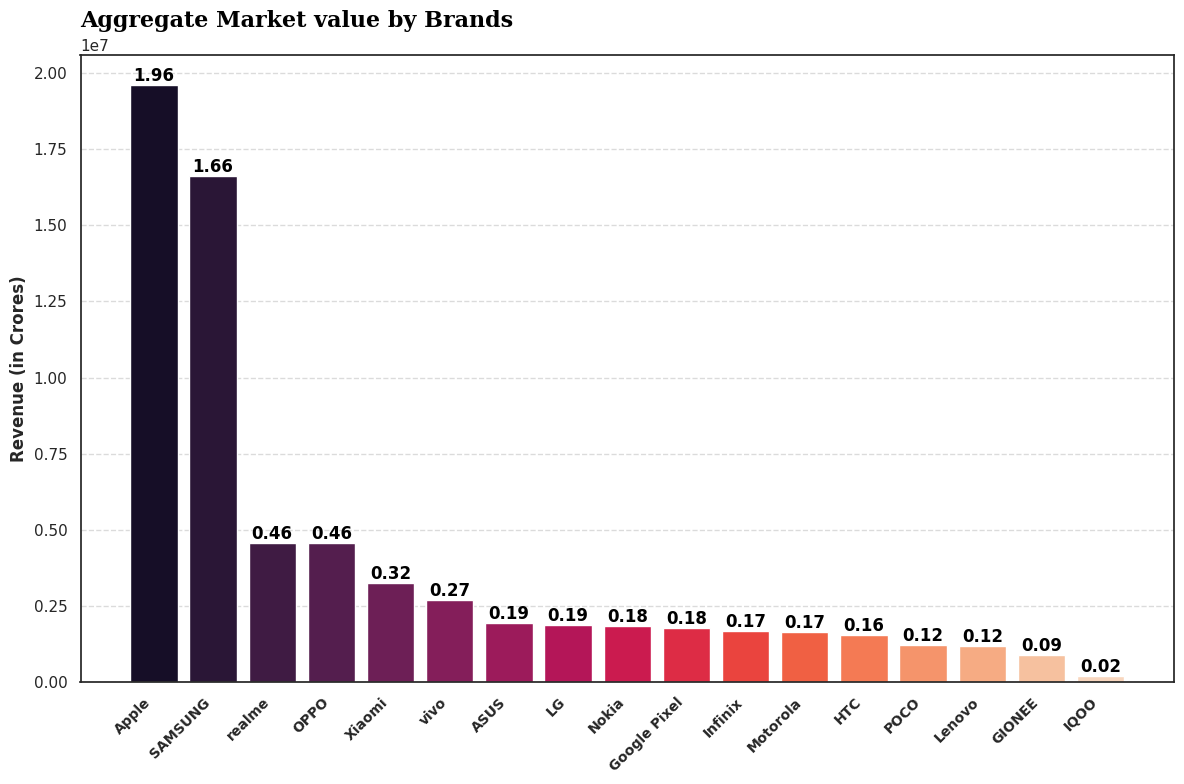

In [197]:
cors = sns.color_palette("rocket", len(revenue))
#adjusting explode
#ploting pie chart with requires settings
plt.figure(figsize=(12, 8))
bars = plt.bar(revenue.index, revenue.values, color=cors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,f'{yval/10**7:.2f}', va='bottom', ha='center', fontsize=12, color='black', weight='bold')

# Customize x-axis and y-axis labels
plt.ylabel('Revenue (in Crores)', fontsize=12, weight='bold')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')

plt.title("Aggregate Market value by Brands", 
          pad=20 , 
          loc="left" ,
          fontdict={'family':'serif',
                    'color':'Black',
                    'weight':'bold',
                    'size': 16,
                    'stretch':'expanded'})

# Show the plot
plt.tight_layout()
plt.show()



### 4. Mean rating of each brand

In [137]:
brand_rating = data[["Brands","Rating"]]
brand_rating = brand_rating.dropna()
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
3,Infinix,4.2
4,Apple,4.6
5,GIONEE,4.0
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


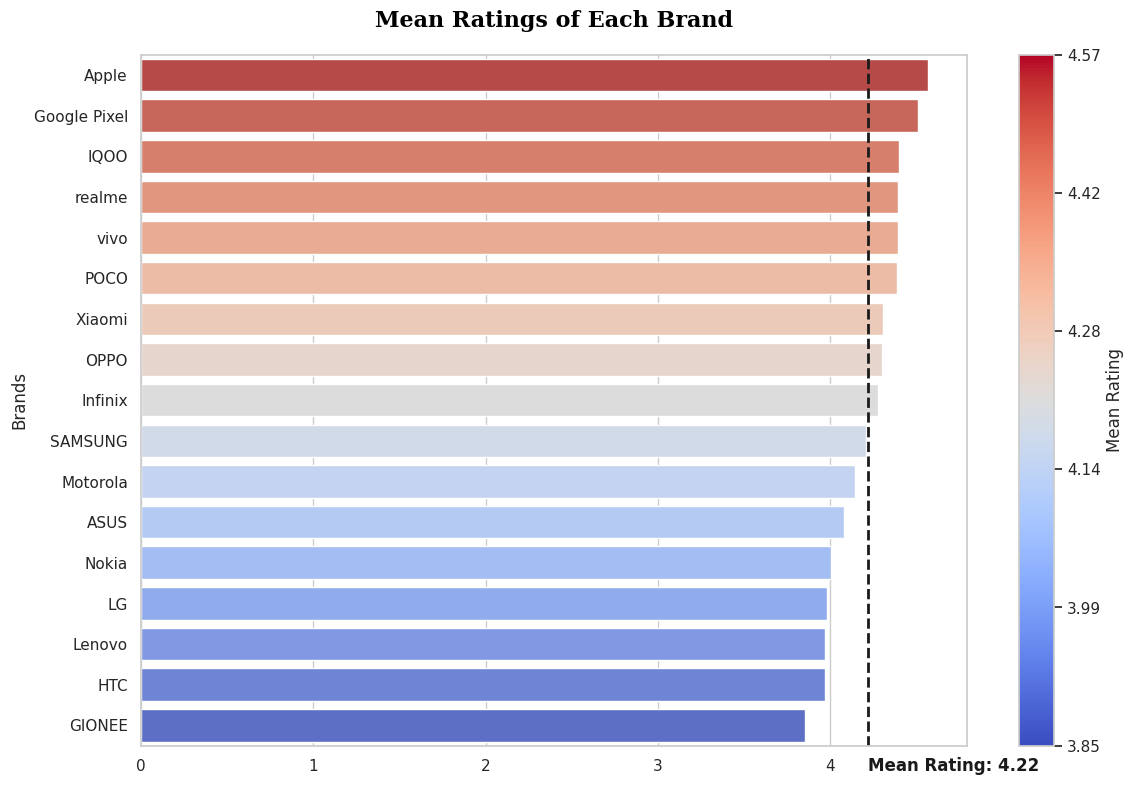

In [199]:
# Calculate mean rating for each brand and sort
Mean_agg_rating = brand_rating.groupby('Brands').mean('Rating')
Mean_agg_rating = Mean_agg_rating.Rating.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_rating.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Ratings of Each Brand", pad=20 , loc="center" ,fontdict={'family':'serif', 'color':'Black', 'weight':'bold', 'size': 16, 'stretch':'expanded'})

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_rating))[::-1]
sns.barplot(y=Mean_agg_rating.index, x=Mean_agg_rating.values, hue=Mean_agg_rating.index, palette=custom_palette, dodge=False, legend=False)


# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_rating), f'Mean Rating: {cutoff_value:.2f}', color='k', va='center', fontsize=12, weight='bold')
# plt.text ( x,y, text, color, va, fontsize, weight)

# Add a color bar
norm = plt.Normalize(Mean_agg_rating.min(), Mean_agg_rating.max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Rating')
cbar.set_ticks(np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6)])

# Show the plot
plt.tight_layout()
plt.show()

We can see apple is the most rated brand in the dataset. This signifies that apple has the most number of models with higher ratings.

The reasons could be that apple has the best pricing strategy or the best quality of the products, or it is reaping the benefits of the brand name. 

We will see this in the upcoming price discount analysis.

### 5. Price Spread in the dataset

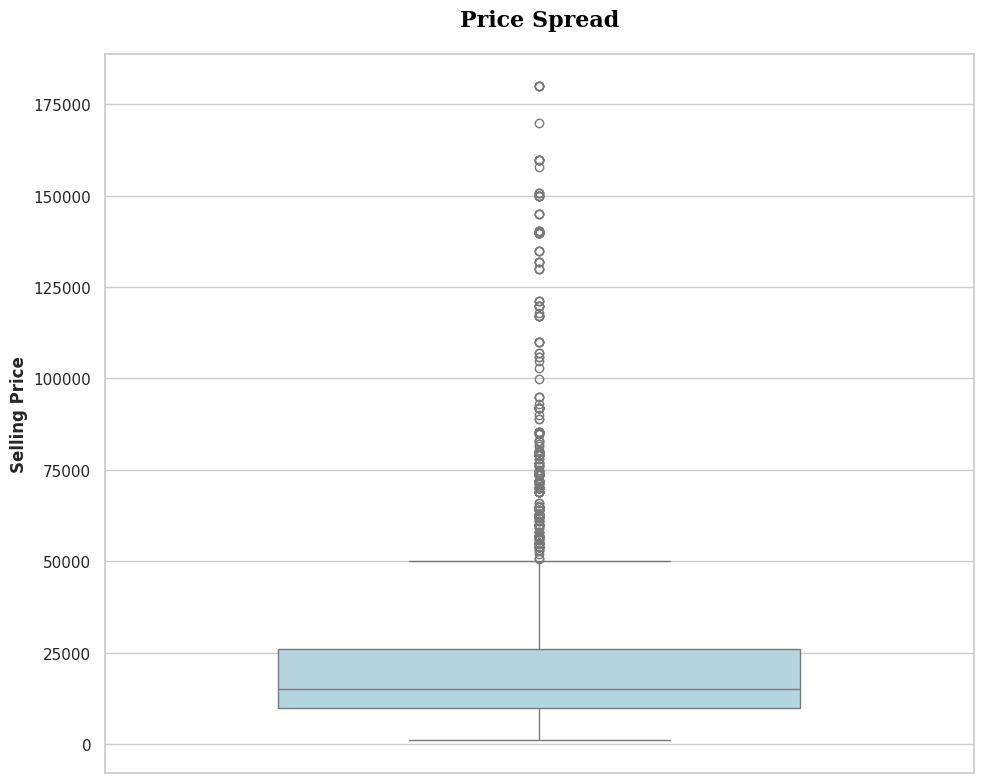

In [205]:
plt.figure(figsize=(10, 8))

sns.boxplot(y=data['Selling Price'], color='lightblue', width=0.6, orient='v')

plt.title("Price Spread", pad=20 , loc="center" ,fontdict={'family':'serif', 'color':'Black', 'weight':'bold', 'size': 16, 'stretch':'expanded'})
plt.xlabel('')
plt.ylabel('Selling Price', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

We can see that the majority of the products are in the price range of 10000 to 25000. But there are also many products above 50000 as well.

### 6. Top 5 brands with highest discounts and with their selling price

In [140]:
mobile_discount = data[["Mobile","Selling Price","Original Price","Discount"]]
mobile_discount

,Mobile,Selling Price,Original Price,Discount
0,SAMSUNG GALAXY M31S,19330,20999,1669
1,Nokia 3.2,10199,10199,0
3,Infinix Note 5,12999,12999,0
4,Apple iPhone 11,49900,49900,0
5,GIONEE L800,2199,2199,0
...,...,...,...,...
3104,LG Q Stylus,20000,20000,0
3107,SAMSUNG Galaxy S Duos 2,5999,5999,0
3108,SAMSUNG Metro 313,2299,2299,0
3109,POCO M4 Pro 5G,16999,19999,3000


In [141]:
mobile_discount.sort_values("Discount") #oppo cheating customers

,Mobile,Selling Price,Original Price,Discount
2137,OPPO A5s,12990,4990,-8000
1817,Lenovo S90 Or Sisley S90,12999,12999,0
1816,SAMSUNG Galaxy S21 SE 5G,59990,59990,0
1815,SAMSUNG Galaxy M01,9990,9990,0
1814,Motorola G 3rd Generation,9999,9999,0
...,...,...,...,...
2632,LG Wing,29999,80000,50001
306,ASUS ROG,26499,83999,57500
848,Motorola Razr 5G,89999,149999,60000
711,Motorola Razr,74999,149999,75000


In [142]:
top_5_mobiles = mobile_discount.sort_values("Discount",ascending=False).head(5)
top_5_mobiles = top_5_mobiles[['Mobile','Original Price','Discount']]
top_5_mobiles


,Mobile,Original Price,Discount
589,Motorola Razr,149999,75000
711,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001


In [143]:
# print all data where model is "Motorola Razr"
data[data['Mobile'] == 'Motorola Razr']

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
589,Motorola,Razr,Gold,6 GB,128 GB,Yes,3.8,74999,149999,Motorola Razr,75000,50.000333
711,Motorola,Razr,Black,6 GB,128 GB,Yes,3.8,74999,149999,Motorola Razr,75000,50.000333


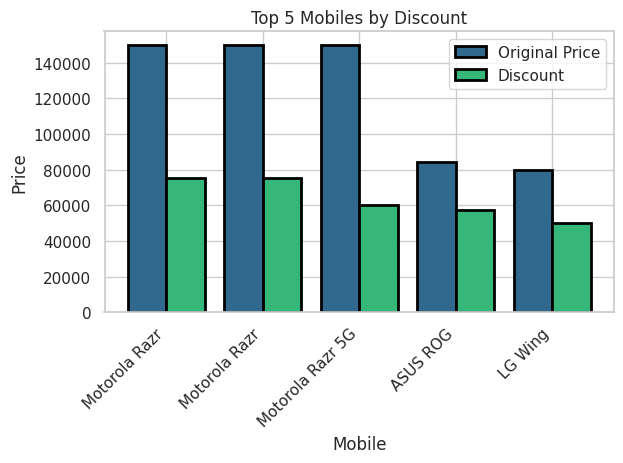

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Define the bar width and index positions
bar_width = 0.4
index = np.arange(len(top_5_mobiles['Mobile']))

# Create a color palette
palette = sns.color_palette("viridis", n_colors=2)  # Choose a palette and number of colors

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for Original Price and Discount using the Seaborn color palette
bar1 = ax.bar(index, top_5_mobiles['Original Price'], bar_width, color=palette[0], edgecolor='black', linewidth=2, label='Original Price')
bar2 = ax.bar(index + bar_width, top_5_mobiles['Discount'], bar_width, color=palette[1], edgecolor='black', linewidth=2, label='Discount')

# Set the labels and title
ax.set_xlabel('Mobile')
ax.set_ylabel('Price')
ax.set_title('Top 5 Mobiles by Discount')

# Set the x-ticks and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_5_mobiles['Mobile'], rotation=45, ha='right')

# Adding a legend
ax.legend()

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()


We can see motorola leads the chart with the highest discount rate ASUS and LG

Does the brands give this kind of discount or is it just a one time thing?

### 7. Brand wise discount distribution

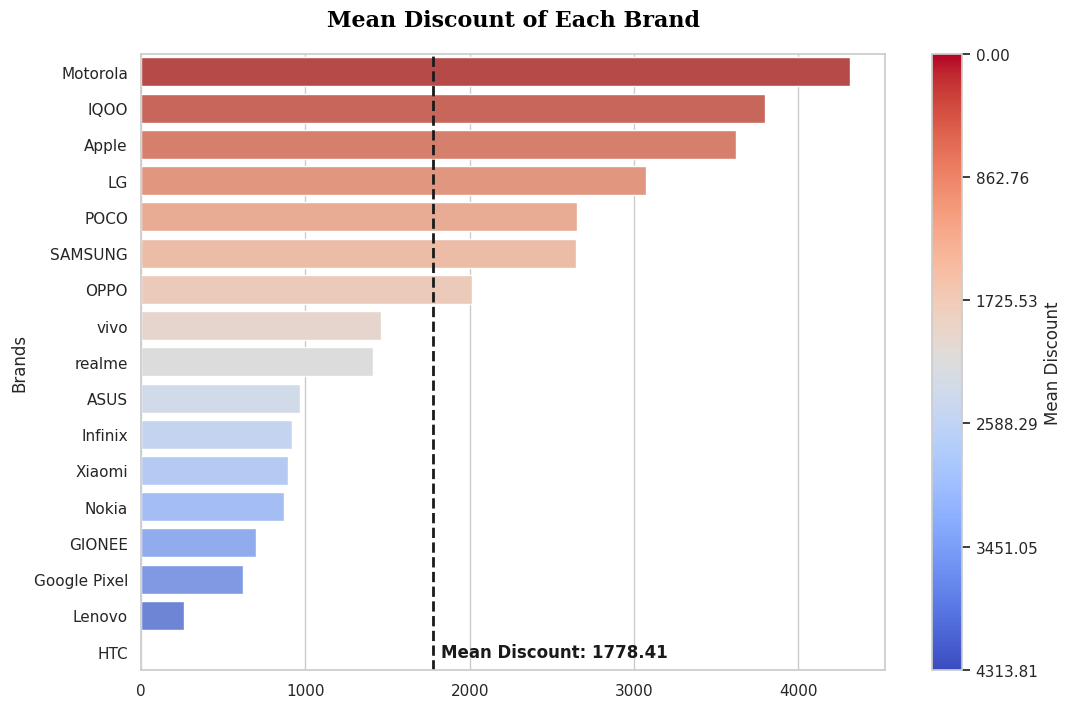

In [207]:
# Calculate mean discount for each brand and sort
Mean_agg_discount = data.groupby('Brands').mean('Discount')
Mean_agg_discount = Mean_agg_discount.Discount.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_discount.mean()  # Set your cutoff value

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
plt.title("Mean Discount of Each Brand", pad=20 , loc="center" ,fontdict={'family':'serif', 'color':'Black', 'weight':'bold', 'size': 16, 'stretch':'expanded'})

# Create the bar plot without hue
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_discount))[::-1]  # Reverse the palette to match the sorted order
sns.barplot(x=Mean_agg_discount.values, y=Mean_agg_discount.index, palette=custom_palette, hue=Mean_agg_discount.index, dodge=False, legend=False)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value+50, len(Mean_agg_discount) - 1, f'Mean Discount: {cutoff_value:.2f}', color='k', va='center', fontsize=12, weight='bold')

# Add a color bar
norm = plt.Normalize(Mean_agg_discount.min(), Mean_agg_discount.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Discount')
cbar.set_ticks(np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6)][::-1])  # Reverse the tick labels

# Show the plot
plt.show()


We can see that the most customer friendly brand is maybe *Moto* as it has the highest discount rate but does it have a reasonable selling price?

As per our previous chart, indeed *Motorola* and *LG* are in the top position in terms of discount rate, but *Asus* mean discount rate is not always the highest.

### 8. Mean selling price of each brand

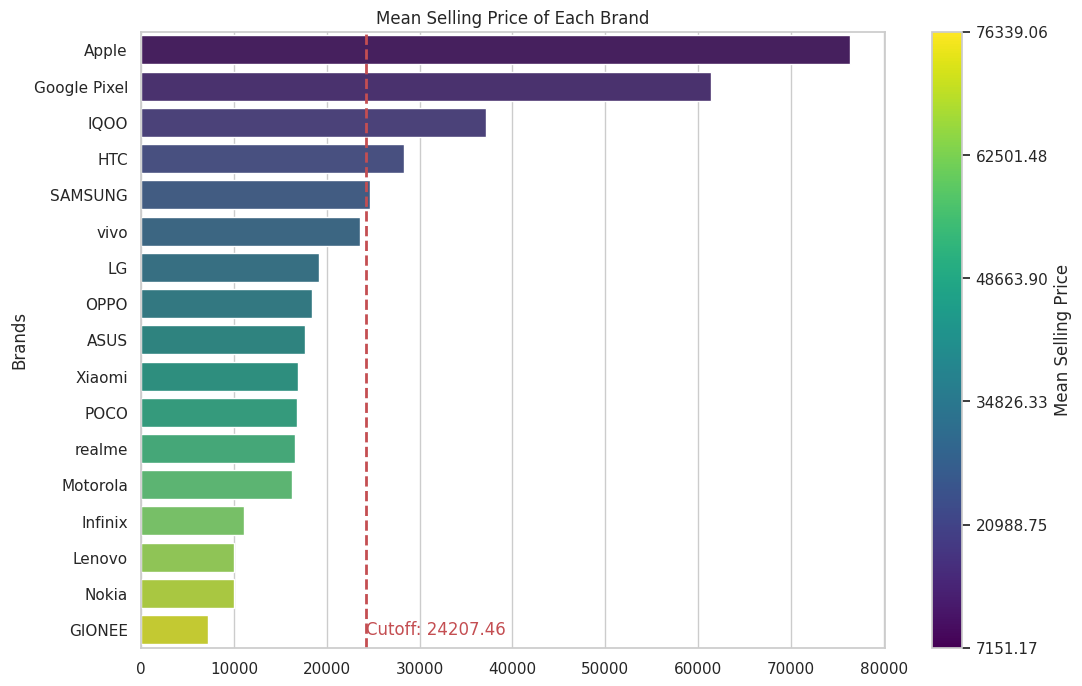

In [146]:
# Calculate mean selling price for each brand and sort
Mean_agg_saleprice = data.groupby('Brands').mean('Selling Price')
Mean_agg_saleprice = Mean_agg_saleprice['Selling Price'].sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_saleprice.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Selling Price of Each Brand")

# Create the horizontal bar plot
custom_palette = sns.color_palette("viridis", len(Mean_agg_saleprice))
sns.barplot(y=Mean_agg_saleprice.index, x=Mean_agg_saleprice.values, palette=custom_palette, hue=Mean_agg_saleprice.index, dodge=False, legend=False)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='r', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_saleprice) - 1, f'Cutoff: {cutoff_value:.2f}', color='r', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_saleprice.min(), Mean_agg_saleprice.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Selling Price')
cbar.set_ticks(np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6)])

# Show the plot
plt.show()

We can see in terms of selling price *Motorola* is very low in the list making it very consumer friendly, along with gionee and nokia 

Although Gionee, Nokia, Lenovo have the least selling price, their ratings are also lower compared to other brands.

On contrary to this, Apple has the highest selling price but also has the highest ratings. Hence indeed Apple reaps the benefit of being a luxury brand.

### 9. Selling price trends 

Does the most expensive mobiles have the highest ratings? What is the ratings of the cheapest mobiles?

In [147]:
selling_price = data[["Mobile","Selling Price"]].sort_values("Selling Price",ascending=False)
sellingprice_agg_mobile = selling_price.groupby("Mobile").mean("Selling Price").sort_values("Selling Price",ascending=False)
rating = data[["Mobile","Rating"]].sort_values("Rating",ascending=False)
rating_agg_mobile = rating.groupby("Mobile").mean("Rating")

In [148]:
t5ag = sellingprice_agg_mobile.head(5)
#t5ag
l5ag = sellingprice_agg_mobile.tail(5)[::-1]
#l5ag
t5sp = selling_price.head(10)
#t5sp
l5sp = selling_price.tail(5)[::-1]
#l5sp

In [149]:
l5sp

,Mobile,Selling Price
2054,Nokia Ta -1010/105,1000
1501,Nokia 105,1000
978,GIONEE L700,1099
2487,GIONEE S96,1099
485,Nokia TA-1174 / TA-1299,1149


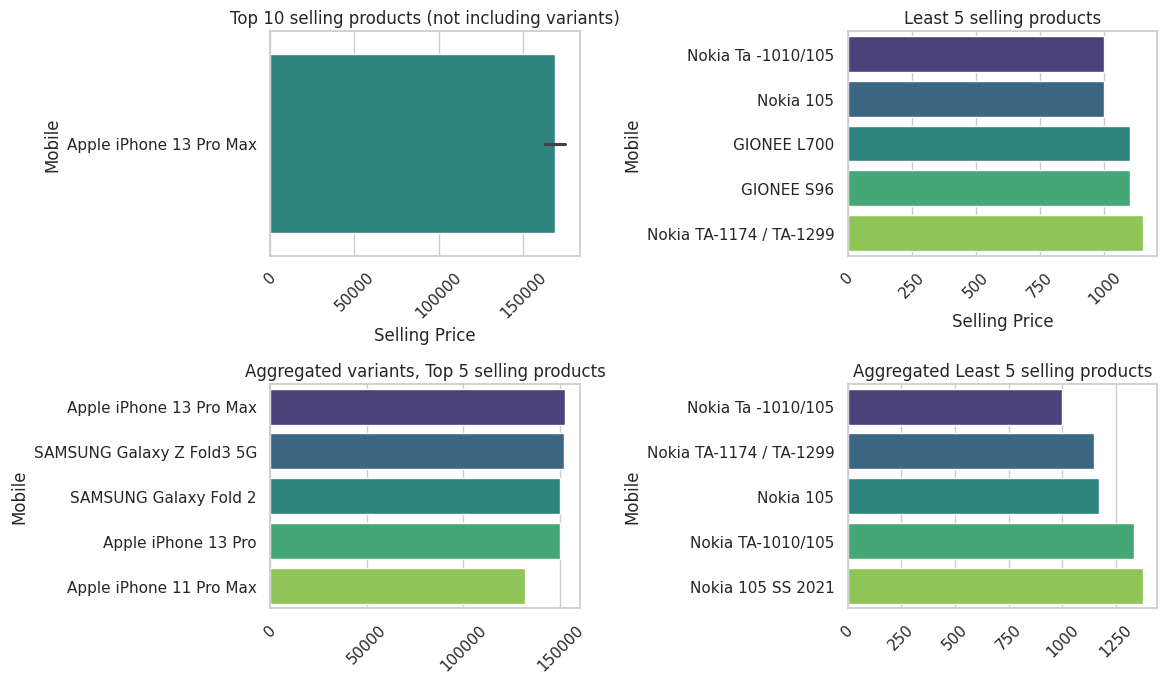

In [150]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Top 5 selling products
plt.subplot(221)
sns.barplot(y=t5sp.Mobile, x=t5sp['Selling Price'], hue=t5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Top 10 selling products (not including variants)")
plt.xticks(rotation=45)

# Least 5 selling products
plt.subplot(222)
sns.barplot(y=l5sp.Mobile, x=l5sp['Selling Price'], hue=l5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Least 5 selling products")
plt.xticks(rotation=45)

# Aggregated Top 5 selling products
plt.subplot(223)
sns.barplot(y=t5ag.index, x=t5ag['Selling Price'].values, hue=t5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated variants, Top 5 selling products")
plt.xticks(rotation=45)

# Aggregated Least 5 selling products
plt.subplot(224)
sns.barplot(y=l5ag.index, x=l5ag['Selling Price'].values, hue=l5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated Least 5 selling products")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We can find an interesting oberservation here. 
- As per previous knowledge, Apple has the highest selling price phones, and only 3 phone models are in the top 20 most expensive phones.
- Samsungs also is in the list of least selling priced phones, which shows the spread of samsung phones in the market.


### 10. Samsung vs Apple price spread

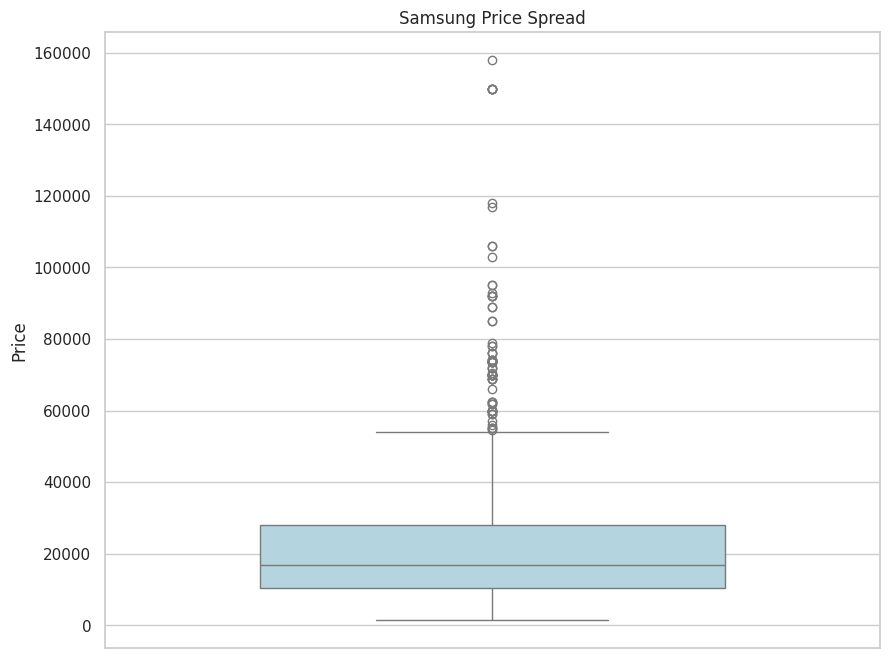

In [151]:
samsung_price = data[data['Brands'] == 'SAMSUNG']

plt.figure(figsize=(10, 8))
plt.title('Samsung Price Spread')

sns.boxplot(y=samsung_price['Selling Price'], color='lightblue', width=0.6, orient='v')

plt.ylabel('Price')
plt.xlabel('')
plt.show()

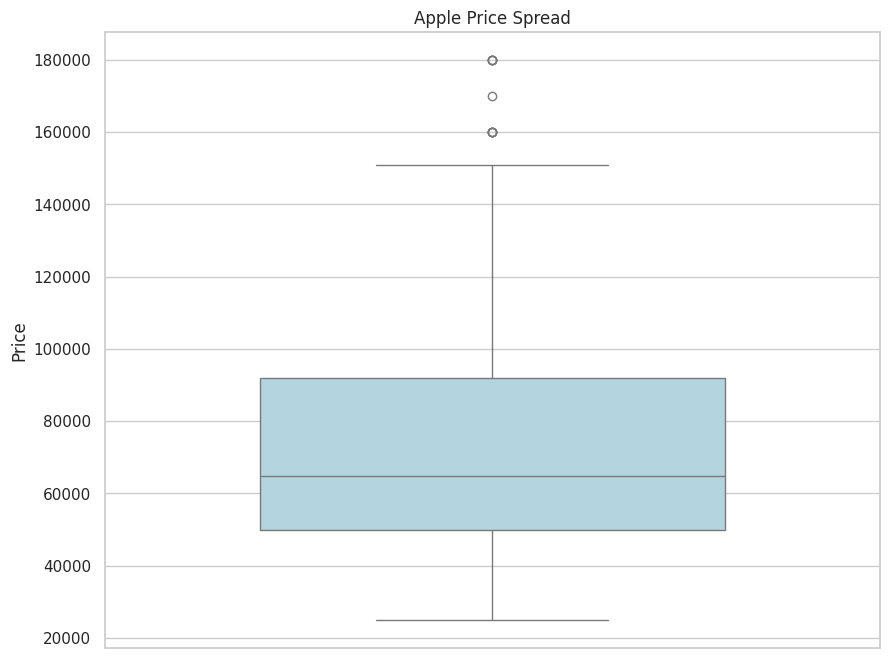

In [152]:
apple_price = data[data['Brands'] == 'Apple']

plt.figure(figsize=(10, 8))
plt.title('Apple Price Spread')

sns.boxplot(y=apple_price['Selling Price'], color='lightblue', width=0.6, orient='v')

plt.ylabel('Price')
plt.xlabel('')
plt.show()

We can see that although much of the products of samsung are clustered in the lower price range, it also have quite a few products in the higher price range.

Apple on the other hand has most of its products in the higher price range.

### 11. Price vs Rating 

In [170]:
price_vs_rating = data[["Mobile","Selling Price","Rating"]].sort_values("Selling Price",ascending=False).sample(500)
price_vs_rating

,Mobile,Selling Price,Rating
1164,Nokia 130,1625,4.2
410,Apple iPhone XS Max,78999,4.6
2292,SAMSUNG Galaxy Core Prime,5490,4.1
2909,Infinix Smart 2,7946,4.1
3042,Xiaomi Redmi Note 7S,13999,4.4
...,...,...,...
1898,SAMSUNG Galaxy M30s,15990,4.1
1995,Nokia TA-1010/105,1340,4.2
1145,SAMSUNG Galaxy Note 5,46300,4.1
294,Nokia 107 Dual SIM,1900,4.2


In [174]:
price_vs_rating["Selling Price"].corr(price_vs_rating["Rating"])

0.3760373762873413

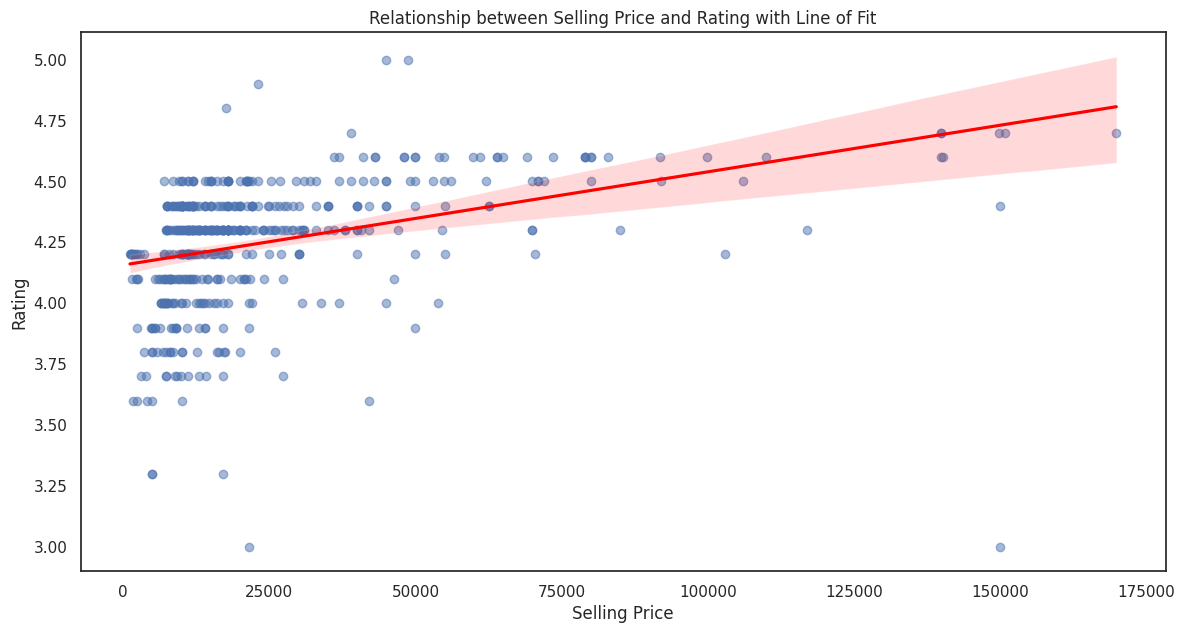

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(14, 7))
sns.regplot(x=price_vs_rating["Selling Price"], y=price_vs_rating["Rating"], line_kws={"color":"red"}, scatter_kws={"alpha":0.5})

# Adding labels and title
plt.xlabel("Selling Price")
plt.ylabel("Rating")
plt.title("Relationship between Selling Price and Rating with Line of Fit")

# Display the plot
plt.show()


For premium model there is a general trend that the ratings are higher for higher priced models. (Which may also be biased due to the high price a customer pays for the product).

The lower to mid range models have a wide spread of ratings.

### 12. Memory(RAM) distribution 

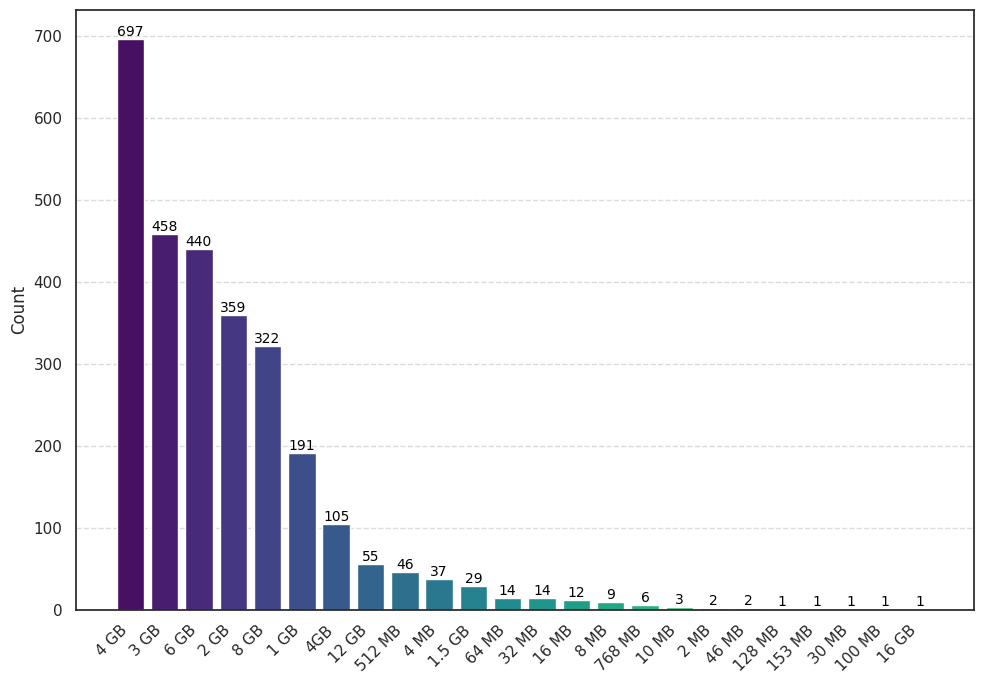

In [178]:
Mem = data['Memory'].value_counts()

cors = sns.color_palette("viridis", len(Mem))
#adjusting explode
#ploting pie chart with requires settings
plt.figure(figsize=(10, 7))
bars = plt.bar(Mem.index, Mem.values, color=cors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


By far the most popular memory size is 4GB, which is obvious as most of the phones are in the mid range category. There is one 16 GB model which means companies do not target the gaming industry much.

### 13. Internal Memory (ROM) distribution

In [186]:
storage = data['Storage'].value_counts()
storage.index = storage.index.str.replace('Expandable Upto 32 GB', '32 GB')
storage.index = storage.index.str.replace('Expandable Upto 16 GB', '16 GB')
storage.index

Index(['64 GB', '128 GB', '32 GB', '16 GB', '256 GB', '8 GB', '4 GB', '512 GB',
       '4 MB', '2 MB', '128 MB', '32 GB', '16 MB', '16 GB', '1 TB', '64 MB',
       '129 GB', '512 MB', '256 MB', '130 GB', '8 MB', '100 MB', '153 MB',
       '10 MB', '140 MB'],
      dtype='object', name='Storage')

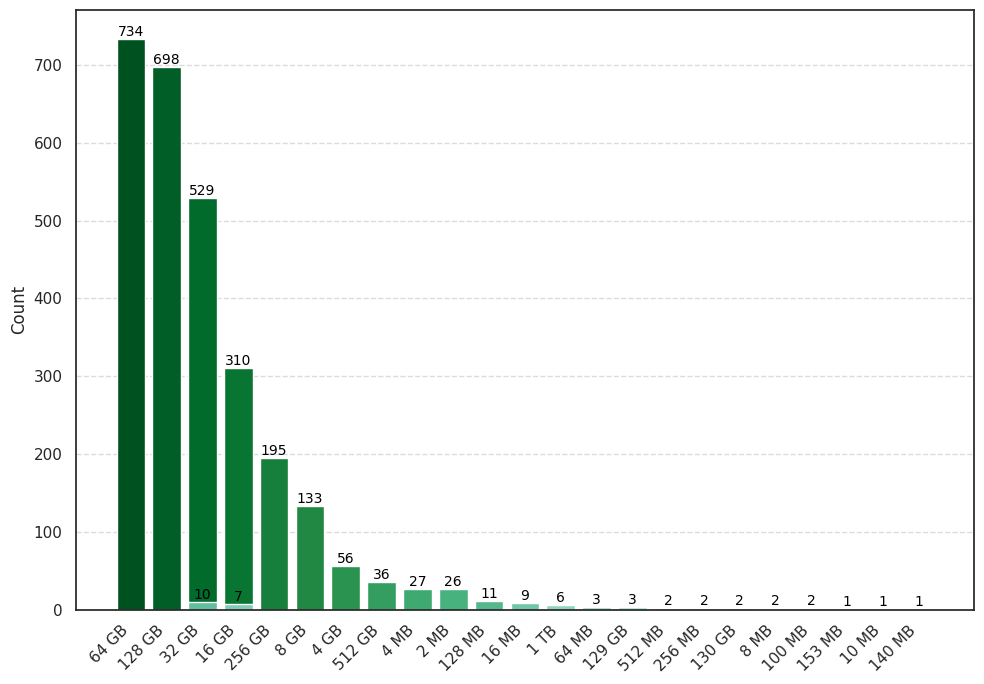

In [185]:



cors = sns.color_palette("BuGn", len(Mem))[::-1]
#adjusting explode
#ploting pie chart with requires settings
plt.figure(figsize=(10, 7))
bars = plt.bar(storage.index, storage.values, color=cors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The fact that companies are focusing on more 64GB and 128GB models is very good, which shows how demands are increasing for more storage.

### 14. Heatmap among all the features

In [154]:
from sklearn.preprocessing import OrdinalEncoder

In [155]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


In [156]:
data_converted = conversiontoMB(data)

data_converted = data_converted.dropna().drop(columns=['Camera'])

categorical_columns = data_converted.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

data_converted[categorical_columns] = ordinal_encoder.fit_transform(data_converted[categorical_columns])

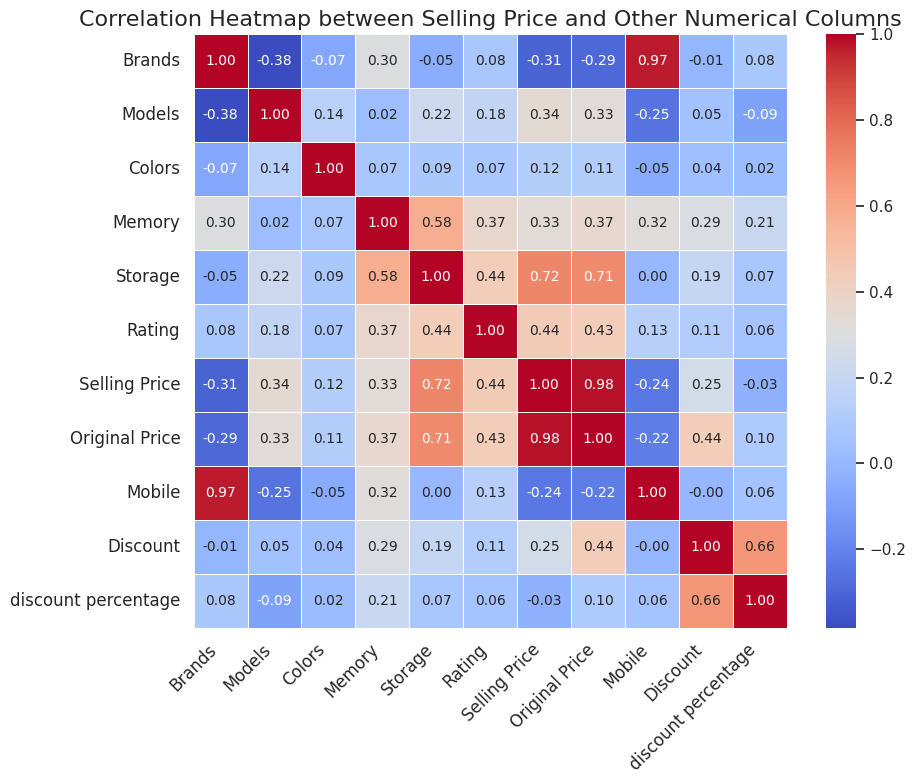

In [189]:
# Set the Seaborn theme for better aesthetics
sns.set_theme(style="white")

# Create a larger figure
plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Create the heatmap with improved readability
ax = sns.heatmap(
    data_converted.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10},  # Adjust the annotation font size
    linewidths=.5,  # Add separation between cells
    square=True  # Ensure cells are square
)

# Set title and adjust labels
plt.title('Correlation Heatmap between Selling Price and Other Numerical Columns', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [158]:
color_vs_price = data[['Colors','Selling Price']].sort_values(by='Selling Price',ascending=False)
color_vs_price

,Colors,Selling Price
813,Graphite,179900
799,Sierra Blue,179900
831,Gold,179900
903,Silver,179900
1974,Alpine Green,169900
...,...,...
485,Black,1149
2487,Black,1099
978,Black,1099
1501,Black,1000


In [159]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your original DataFrame

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'Colors' column
color_vs_price['Color_Encoded'] = ordinal_encoder.fit_transform(color_vs_price[['Colors']])
color_vs_price



,Colors,Selling Price,Color_Encoded
813,Graphite,179900,249.0
799,Sierra Blue,179900,496.0
831,Gold,179900,241.0
903,Silver,179900,498.0
1974,Alpine Green,169900,6.0
...,...,...,...
485,Black,1149,44.0
2487,Black,1099,44.0
978,Black,1099,44.0
1501,Black,1000,44.0


In [160]:
correlation = color_vs_price['Color_Encoded'].corr(color_vs_price['Selling Price'])
correlation


0.11554238631933991

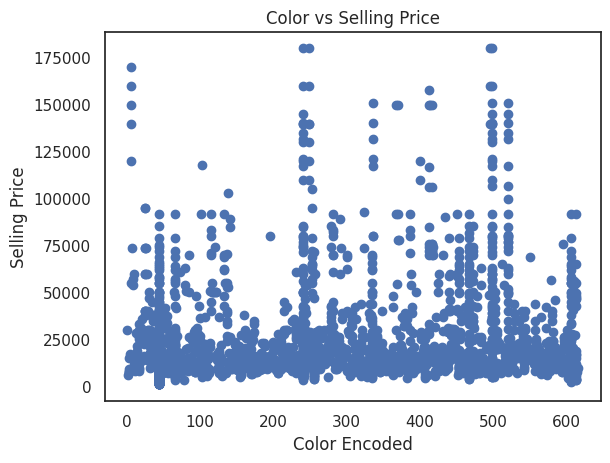

In [161]:
color_vs_price.sort_values(by='Color_Encoded', inplace=True)
plt.figure()
plt.scatter(color_vs_price['Color_Encoded'], color_vs_price['Selling Price'])
plt.xlabel('Color Encoded')
plt.ylabel('Selling Price')
plt.title('Color vs Selling Price')
plt.show()

In [162]:
correlation = data['Selling Price'].corr(data['Discount'])
correlation

0.253593048263056

In [163]:
correlation = data['Selling Price'].corr(data['discount percentage'])
correlation

-0.0306653462070454

In [164]:
#data['Selling Price'].mean()